In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [55]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [56]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [57]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_miceDF = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989", :]
duplicate_miceDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = study_data_complete[study_data_complete["Mouse ID"] != "g989"]
cleanDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [59]:
# Checking the number of mice in the clean DataFrame.
len(cleanDF["Mouse ID"].unique())

248

## Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
cleanDF_mean = cleanDF.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
cleanDF_median = cleanDF.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
cleanDF_var = cleanDF.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
cleanDF_std = cleanDF.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
cleanDF_sem = cleanDF.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.
summary_table = pd.DataFrame(
        {
            "Mean Tumor Volume" : cleanDF_mean,
            "Median Tumor Volume": cleanDF_median,
            "Tumor Volume Variance": cleanDF_var,
            "Tumor Volume Std. Dev.": cleanDF_std,
            "Tumor Volume Std. Err.": cleanDF_sem
        }
)
summary_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_groups = cleanDF.groupby('Drug Regimen')
summary_table = drug_groups.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
# Using the aggregation method, produce the same summary statistics in a single line
summary_table

# I wasn't able to get the "Tumor Volume (mm3)" to display above the data frame like in Dr. A's output

C:\Users\Joe\AppData\Local\Temp\ipykernel_13868\340313776.py:3: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_table = drug_groups.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [62]:
mice_per_drug = study_data_complete.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_per_drug_df = pd.DataFrame(mice_per_drug)
mice_per_drug_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,161
Ramicane,228
Stelasyn,181


<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

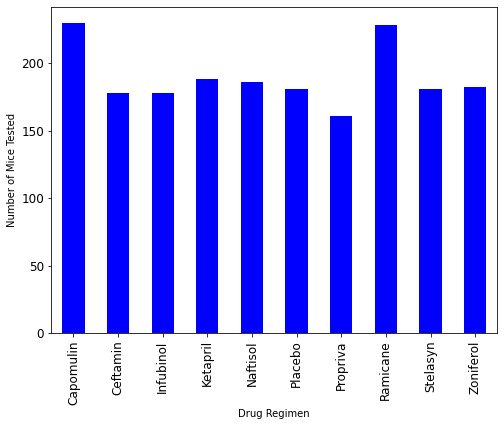

In [63]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_per_drug = study_data_complete.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_pandasPlot = mice_per_drug.plot.bar(figsize=(8,6), color='b',fontsize = 12)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
mice_pandasPlot

<BarContainer object of 10 artists>

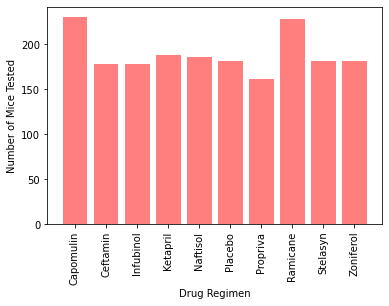

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_per_drug_list = mice_per_drug.tolist()
x_axis = np.arange(len(mice_per_drug_list))
mice_pyPlot = plt.bar(x_axis, mice_per_drug, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
xticklabels = mice_per_drug.index
plt.xticks(tick_locations, xticklabels, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
mice_pyPlot

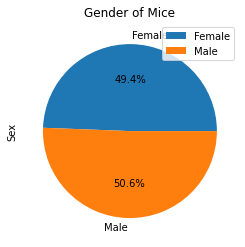

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_per_gender = study_data_complete.groupby(["Sex"]).count()["Mouse ID"]
mice_per_genderDF = pd.DataFrame(mice_per_gender)
mice_per_genderDF

gender_pie = mice_per_genderDF.plot(kind="pie", y='Mouse ID', title=("Gender of Mice"), autopct="%1.1f%%")
gender_pie.set_ylabel("Sex")

plt.show()

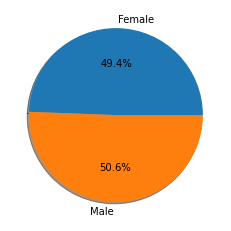

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = mice_per_genderDF["Mouse ID"].tolist()
labels = ["Female", "Male"]

plt.pie(gender_count, labels=labels, autopct="%1.1f%%", shadow=True, startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [67]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin_df = cleanDF.loc[cleanDF["Drug Regimen"] == "Capomulin",:]
ramicane_df = cleanDF.loc[cleanDF["Drug Regimen"] == "Ramicane", :]
infubinol_df = cleanDF.loc[cleanDF["Drug Regimen"] == "Infubinol", :]
ceftamin_df = cleanDF.loc[cleanDF["Drug Regimen"] == "Ceftamin", :]

capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_volDF = pd.DataFrame(capomulin_last)
capomulin_mergeDF = pd.merge(capomulin_volDF, cleanDF, on=("Mouse ID","Timepoint"),how="left")
capomulin_mergeDF.head()

ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_volDF = pd.DataFrame(ramicane_last)
ramicane_mergeDF = pd.merge(ramicane_volDF, capomulin_mergeDF, how="left")
ramicane_mergeDF.head()

infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_volDF = pd.DataFrame(infubinol_last)
infubinol_mergeDF = pd.merge(infubinol_volDF, ramicane_mergeDF, how="left")
infubinol_mergeDF.head()

ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_volDF = pd.DataFrame(ceftamin_last)
group_mergeDF = pd.merge(ceftamin_volDF, infubinol_mergeDF, how="left")
group_mergeDF

merged_dataDF = pd.merge(group_mergeDF, cleanDF, on=("Mouse ID","Timepoint"),how="left")

In [68]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_volDF = pd.DataFrame(capomulin_last)
capomulin_mergeDF = pd.merge(capomulin_volDF, cleanDF, on=("Mouse ID","Timepoint"),how="left")
capomulin_mergeDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_volDF = pd.DataFrame(ramicane_last)
ramicane_mergeDF = pd.merge(ramicane_volDF, cleanDF, on=("Mouse ID","Timepoint"),how="left")
ramicane_mergeDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20


In [70]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_volDF = pd.DataFrame(infubinol_last)
infubinol_mergeDF = pd.merge(infubinol_volDF, cleanDF, on=("Mouse ID","Timepoint"),how="left")
infubinol_mergeDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a577,30,57.031862,2,Infubinol,Female,6,25
3,a685,45,66.083066,3,Infubinol,Male,8,30
4,c139,45,72.226731,2,Infubinol,Male,11,28


In [71]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_volDF = pd.DataFrame(ceftamin_last)
ceftamin_mergeDF = pd.merge(ceftamin_volDF, cleanDF, on=("Mouse ID","Timepoint"),how="left")
ceftamin_mergeDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a275,45,62.999356,3,Ceftamin,Female,20,28
1,b447,0,45.000000,0,Ceftamin,Male,2,30
2,b487,25,56.057749,1,Ceftamin,Female,6,28
3,b759,30,55.742829,1,Ceftamin,Female,12,25
4,f436,15,48.722078,2,Ceftamin,Female,3,25


In [80]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxDF= pd.DataFrame(cleanDF.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
maxDF

# Merge max timepoint onto data_df
merged_df = pd.merge(cleanDF, maxDF, on='Mouse ID')
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_timepoint
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,b128,5,45.651331,0,Capomulin,Female,9,22,45
2,b128,10,43.270852,0,Capomulin,Female,9,22,45
3,b128,15,43.784893,0,Capomulin,Female,9,22,45
4,b128,20,42.731552,0,Capomulin,Female,9,22,45


In [84]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    drugDF = merged_df.loc[merged_df['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volumeDF = drugDF.loc[drugDF['Timepoint'] == drugDF['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volumeDF['Tumor Volume (mm3)']
    tumor_vol_list.append(values)
    
    quartiles = values.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Print statement
    print(f"{drug}'s potential outliers: less than {lower_bound} or greater than {upper_bound}")

Capomulin's potential outliers: less than 20.70456164999999 or greater than 51.83201549
Ramicane's potential outliers: less than 17.912664470000003 or greater than 54.30681135
Infubinol's potential outliers: less than 36.83290494999999 or greater than 82.74144559000001
Ceftamin's potential outliers: less than 25.355449580000002 or greater than 87.66645829999999


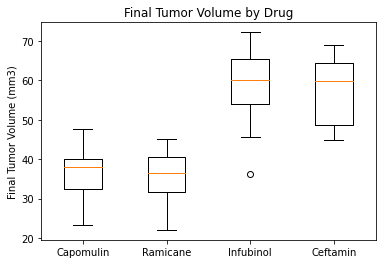

In [85]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_list)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

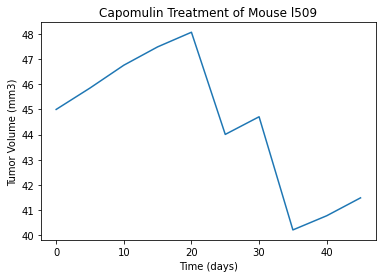

In [89]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = cleanDF.loc[cleanDF['Mouse ID'] == 'l509']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])

# Add labels and title
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse l509")
plt.show()

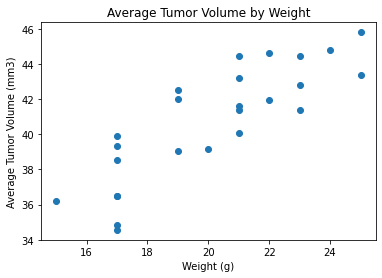

In [95]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulinDF = cleanDF.loc[cleanDF['Drug Regimen'] == 'Capomulin']
avgDF = pd.DataFrame(capomulinDF.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values())
# Merge average tumor volume onto data_df and drop duplicates
avgDF = avgDF.reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume (mm3)'})

avgDF = pd.merge(capomulinDF, avgDF, on='Mouse ID')
avgDF_final= avgDF[['Weight (g)', 'Average Tumor Volume (mm3)']].drop_duplicates()
avgDF_final

x = avgDF_final['Weight (g)']
y = avgDF_final['Average Tumor Volume (mm3)']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.title('Average Tumor Volume by Weight')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [96]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")
plt.show()

The correlation between mouse weight and the average tumor volume is 0.84.


The correlation between mouse weight and the average tumor volume is 0.84.


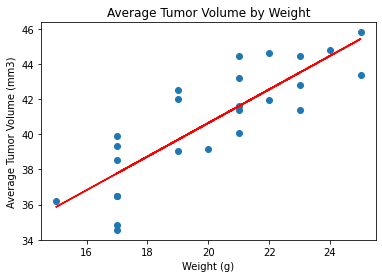

In [102]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(x,y)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x, regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

plt.show()